Code to resize/rescale cropped person image to 244 x 244

In [1]:
import matplotlib.pyplot as plt
import cv2
import glob
import os
import random
import subprocess
import numpy as np
from PIL import Image

In [ ]:
desired_size = (224, 224)

img_data = 'ppe_0977_0.jpg'
img_dir = "/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/hardhat_highvizvest_dataset/cropped_person_images_labels/images"
rescaled_img_dir = "/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/images"

img_fp = os.path.join(img_dir, img_data)
out_img_fp = os.path.join(rescaled_img_dir, img_data)

image = Image.open(img_fp)

img_width = image.size[0]
img_height = image.size[1]

print(f'Image Width: {img_width}\nImage Height: {img_height}')

scale = min(desired_size[0]/img_width, desired_size[1]/img_height)
new_width = round(scale*img_width)
new_height = round(scale*img_height)
image_to_resize = image.resize((new_width, new_height), Image.ANTIALIAS)

image_to_resize.save(out_img_fp, "JPEG")

scale_x = image.size[0]/new_width
scale_y = image.size[1]/new_height

print(f'\nNew width: {new_width}')
print(f'New Height: {new_height}')
print(f'Scale_x: {scale_x}')
print(f'Scale_y: {scale_y}')



In [51]:
image = Image.open("/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/cropped_person_images/ppe_0977_0.jpg")
print(image.size)

(167, 441)


/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/cropped_person_images/ppe_0977_0.jpg
Original shape of image before resize
Width: 167 Height: 441


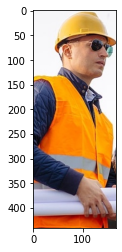

/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/images/ppe_0977_0.jpg
Shape of image after resized to (w=244, h=244)
Width: 92 Height: 244


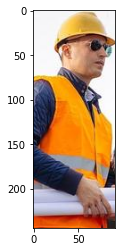

In [53]:
# Before resize
# img_path = image_height_toresize[9]
img_fp_ = '/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/cropped_person_images/ppe_0977_0.jpg'
print(img_fp_)
img_1 = cv2.imread(img_fp_)
print("Original shape of image before resize")
print(f"Width: {img_1.shape[1]} Height: {img_1.shape[0]}")
plt.imshow(img_1[:, :, ::-1])
plt.show()


# After resize
print(out_img_fp)
img_2 = cv2.imread(out_img_fp)
print("Shape of image after resized to (w=244, h=244)")
print(f"Width: {img_2.shape[1]} Height: {img_2.shape[0]}")
plt.imshow(img_2[:, :, ::-1])
plt.show()

Below code function was used to observe before and after image rescale

In [3]:
def show_cropped_rescaled_image(image):

    # Before rescale
    img_1 = cv2.imread('/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/cropped_person_images/'+image)
    print("Shape of cropped person image")
    print(f"Width: {img_1.shape[1]} Height: {img_1.shape[0]}")
    plt.imshow(img_1[:, :, ::-1])
    plt.show()


    # After rescale
    img_2 = cv2.imread('/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images/images/'+image)
    print("Shape of image after resized to (w=244, h=244)")
    print(f"Width: {img_2.shape[1]} Height: {img_2.shape[0]}")
    plt.imshow(img_2[:, :, ::-1])
    plt.show()

Shape of cropped person image
Width: 104 Height: 331


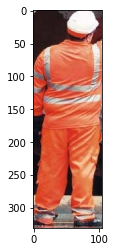

Shape of image after resized to (w=244, h=244)
Width: 77 Height: 244


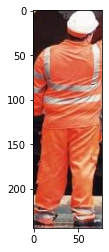

In [4]:
show_cropped_rescaled_image('ppe_0817_0.jpg')

Code to visualise image samples with ground-truth labels

In [5]:
def draw_examples(image_name):
    
    path = "/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images"
    image_path = os.path.join(path, "images", image_name)
    label_path = os.path.join(path, "labels", image_name.replace('jpg','txt'))
    
    # Reading an image in default mode
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    print(f'Image shape: {image.shape}')
    
    # Reading labels
    with open(label_path, "r") as fp:
        lines = fp.readlines()

    print(lines)
    bbox0 = lines[0].strip().split(' ')
    # 13, 1, 135, 60
    start_point0 = (int(bbox0[4]), int(bbox0[5])) 
    end_point0 = (int(bbox0[6]), int(bbox0[7]))
    color0 = (255, 0, 0)
    print(f'Bbox0: {start_point0,end_point0}')
    
    thickness = 2
    image = cv2.rectangle(image, start_point0, end_point0, color0, thickness)

    if len(lines) > 1:
        bbox1 = lines[1].strip().split(' ')
        start_point1 = (int(bbox1[4]), int(bbox1[5]))
        end_point1 = (int(bbox1[6]), int(bbox1[7]))
        color1 = (0, 255, 0)
        thickness = 2
        print(f'Bbox1: {start_point1,end_point1}')
        image = cv2.rectangle(image, start_point1, end_point1, color1, thickness)

    # Displaying the image 
    plt.imshow(image)
    

Image shape: (244, 76, 3)
['hardhat 0 0 0 11 3 47 31 0 0 0 0 0 0 0\n', 'highvizvest 0 0 0 4 45 66 110 0 0 0 0 0 0 0\n']
Bbox0: ((11, 3), (47, 31))
Bbox1: ((4, 45), (66, 110))


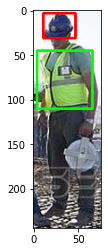

In [16]:
draw_examples('ppe_0917_2.jpg')

Image shape: (244, 83, 3)
['hardhat 0 0 0 29 7 75 38 0 0 0 0 0 0 0\n', 'highvizvest 0 0 0 5 62 80 184 0 0 0 0 0 0 0\n']
Bbox0: ((29, 7), (75, 38))
Bbox1: ((5, 62), (80, 184))


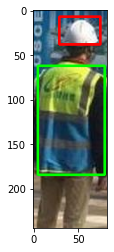

In [12]:
draw_examples('ppe_0751_1.jpg')

Image shape: (244, 72, 3)
['hardhat 0 0 0 8 7 52 30 0 0 0 0 0 0 0\n', 'highvizvest 0 0 0 3 41 65 138 0 0 0 0 0 0 0\n']
Bbox0: ((8, 7), (52, 30))
Bbox1: ((3, 41), (65, 138))


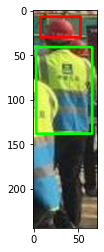

In [100]:
draw_examples('ppe_0751_8.jpg')

### Move images without labels to another directory

In [119]:
# Few images did not generate labels so saving those images in a directory to analyze later
# Possibly images with people with no harhat or vests

dataset_dir = "/home/jaydeep/pictor-ppe/data/CHV_dataset/approach-3/rescaled_images"

# Create a list of all images
image_dir = os.path.join(dataset_dir, "images")
image_fps = glob.glob(os.path.join(image_dir, "*.jpg"))

image_files_all = []
for image_fp in image_fps:
    file = image_fp.split('/')[-1]
    image_files_all.append(file)

# Create a list of images with labels
annotations_dir = os.path.join(dataset_dir, "labels")
annotations_fps = glob.glob(os.path.join(annotations_dir, "*.txt"))

image_files_with_labels = []
for annotations_fp in annotations_fps:
    annot_file = annotations_fp.split('/')[-1]
    image_name = annot_file.replace('txt','jpg')
    image_files_with_labels.append(image_name)

print(f'Images with labels: {len(image_files_with_labels)}')
print(f'Total number of Images: {len(image_files_all)}')


images_not_needed = []
images_needed = []
for file in image_files_all:
    if file in image_files_with_labels:
        images_needed.append(file)
    else:
        images_not_needed.append(file)

print(f'Images needed to move: {len(images_not_needed)}')


Images with labels: 3317
Total number of Images: 3887
Images needed to move: 570


In [131]:
images_not_needed[0]

'ppe_0911_1.jpg'

In [130]:
move_image_to_dir = os.path.join(dataset_dir, "images_with_no_label_files")
for image in images_not_needed:
    move_image_from_dir = os.path.join(image_dir, image)
    subprocess.call(["mv", move_image_from_dir, move_image_to_dir])

### Find images with duplicate bbox for vest and hardhat

In [136]:
# Find labels that have two hardhats or highvizvests for same person
# Move that to a different directory then analyze manually to correct the labels

duplicate_label_list = []

for annotation_fp in annotations_fps:
    with open(annotation_fp, "r") as fp:
        lines = fp.readlines()
        label_list = [line.strip().split(' ')[0] for line in lines]
    if label_list.count('hardhat') > 1 or label_list.count('highvizvest') > 1:
        duplicate_label_list.append(annotation_fp)

In [ ]:
# move from source dir dataset_dir images and labels
# to destination duplicate_labelled_images images and labels dir

move_imag_dir = os.path.join(dataset_dir,'duplicate_labelled_images','images')
move_label_dir = os.path.join(dataset_dir,'duplicate_labelled_images','labels')

for label_fp in duplicate_label_list[1:]:
    label = label_fp.split('/')[-1]
    image = label.replace('txt','jpg')
    print(image)
    print(label)
    subprocess.call(["mv", os.path.join(image_dir, image), move_imag_dir])
    subprocess.call(["mv", os.path.join(annotations_dir, label), move_label_dir])